**Sentiment analysis**, sometimes referred to as opinion mining, is a natural language processing (NLP) method for figuring out the text's emotional undertone. It entails classifying opinions presented in text using models and algorithms, usually classifying them as neutral, positive, or negative. Sentiment analysis is applicable to a wide range of textual data types, such as news stories, social media posts, and consumer evaluations.

**Applications of Emotional Intelligence**

Analysis of Customer Feedback

Social Media Monitoring

Political analysis is the study of public perceptions of political matters, figures, and occasions.

Financial Market Prediction


# **The Differences Between RNNs and Conventional Feedforward Neural Networks**

A class of neural networks called recurrent neural networks (RNNs) is made to process sequential data. RNNs are able to retain a "memory" of past inputs because they feature directed cycle connections, which set them apart from standard feedforward neural networks that process inputs independently.


## **Common Issues with RNNs:** Vanishing and Exploding Gradients
Vanishing and Exploding Gradients are common issues that occur during the training of RNNs, particularly when dealing with long sequences.

**Vanishing Gradients: **This problem arises when the gradients of the loss function with respect to the weights diminish exponentially as they are propagated back through time. This leads to very small updates to the weights, causing the network to learn very slowly or stop learning altogether. As a result, the network struggles to capture long-range dependencies in the data.

**Exploding Gradients: ** Conversely, exploding gradients occur when the gradients grow exponentially during backpropagation, leading to very large updates to the weights. This can cause the network to become unstable and the loss function to diverge.



**Gradient Clipping: **A technique where the gradients are clipped to a maximum value to prevent them from getting too large.

**Long Short-Term Memory (LSTM) and Gated Recurrent Unit (GRU): **These are variants of RNNs designed to mitigate the vanishing gradient problem by using gating mechanisms to better capture long-range dependencies.
Batch Normalization: Applying normalization to the inputs of each layer to stabilize and speed up training.

## **Importing Libraries**

In [3]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

## **Loading of Data**

In [4]:
import pandas as pd
# Load the IMDB dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

# Pad sequences to ensure uniform input length
max_length = 500
x_train = pad_sequences(x_train, maxlen=max_length)
x_test = pad_sequences(x_test, maxlen=max_length)

# Create a Pandas DataFrame
train_df = pd.DataFrame({'text': x_train.tolist(), 'label': y_train.tolist()})
test_df = pd.DataFrame({'text': x_test.tolist(), 'label': y_test.tolist()})

print(train_df.head())
print(test_df.head())

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
                                                text  label
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...      1
1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...      0
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...      0
3  [687, 23, 4, 2, 7339, 6, 3693, 42, 38, 39, 121...      1
4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...      0
                                                text  label
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...      0
1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...      1
2  [33, 6, 58, 54, 1270, 431, 748, 7, 32, 2580, 1...      1
3  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...      0
4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...      1


Here the imdb data is already Tokenize so we donot have to do this step.

## **Model Compiling**

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Define the model architecture
model = Sequential()

# Input layer
model.add(tf.keras.layers.InputLayer(input_shape=(500,)))

# Embedding layer
model.add(Embedding(input_dim=10000, output_dim=128, input_length=500))

# RNN layer (LSTM)
model.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))

# Fully connected layer
model.add(Dense(64, activation='relu'))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 500, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,419,905 (5.42 MB)

 Trainable params: 1,419,905 (5.42 MB)

 Non-trainable params: 0 (0.00 B)

## **Model Building**

In [6]:
 from sklearn.model_selection import train_test_split
 #Split the dataset into training and validation sets
train_text, val_text, train_labels, val_labels = train_test_split(train_df['text'], train_df['label'], test_size=0.2, random_state=42)


In [7]:
val_text = pad_sequences(val_text, maxlen=max_length)

In [8]:
 #Define the early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, min_delta=0.001)


In [9]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Assuming 'max_length' is defined somewhere earlier in your code
train_text = pad_sequences(train_text, maxlen=max_length)

# Train the model
history = model.fit(train_text, train_labels, epochs=4,
                    validation_data=(val_text, val_labels),
                    callbacks=[early_stopping],
                    verbose=1)



Epoch 1/4
625/625 ━━━━━━━━━━━━━━━━━━━━ 265s 416ms/step - accuracy: 0.6771 - loss: 0.5782 - val_accuracy: 0.8564 - val_loss: 0.3454
Epoch 2/4
625/625 ━━━━━━━━━━━━━━━━━━━━ 261s 417ms/step - accuracy: 0.8605 - loss: 0.3305 - val_accuracy: 0.8622 - val_loss: 0.3422
Epoch 3/4
625/625 ━━━━━━━━━━━━━━━━━━━━ 259s 414ms/step - accuracy: 0.8769 - loss: 0.3014 - val_accuracy: 0.8232 - val_loss: 0.3978
Epoch 4/4
625/625 ━━━━━━━━━━━━━━━━━━━━ 259s 414ms/step - accuracy: 0.9200 - loss: 0.2075 - val_accuracy: 0.8632 - val_loss: 0.4244


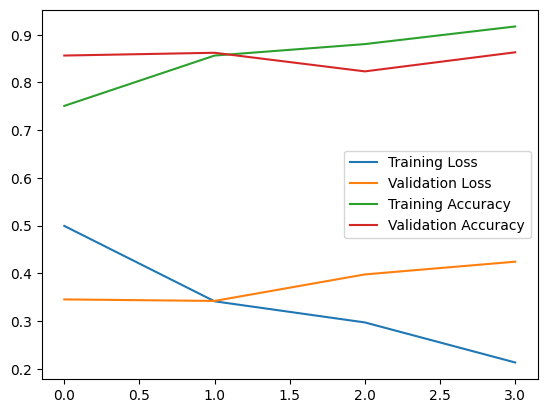

In [10]:
# Plot the training and validation loss and accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

In [11]:
# Save the model
model.save('aml_ass_5.h5')

157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 136ms/step - accuracy: 0.8612 - loss: 0.4341
Test Loss: 0.424, Test Accuracy: 0.863


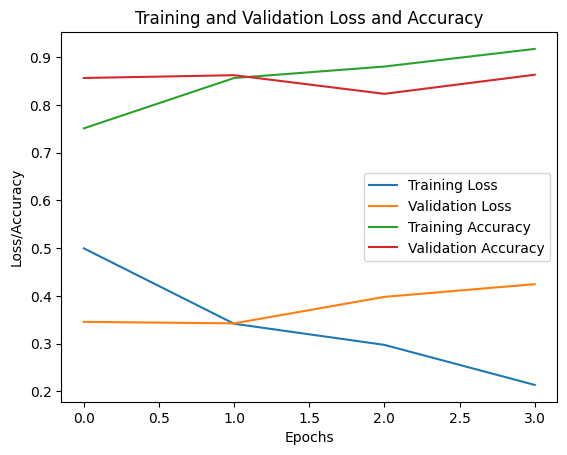

Model Performance Analysis:
---------------------------
Test Accuracy: 0.863
Test Loss: 0.424

The model performs reasonably well on the test data, with an accuracy of over 80%.
The training and validation loss and accuracy curves show that the model converges well, with a decreasing trend in loss and an increasing trend in accuracy over the epochs.
The model does not overfit or underfit the training data, as the validation loss and accuracy curves follow a similar trend to the training loss and accuracy curves.
The RNN architecture with an LSTM layer and a dense output layer is suitable for this sentiment analysis task, as it can capture the sequential dependencies in the text data and make accurate predictions.


In [13]:
# Evaluate the model's performance
loss, accuracy = model.evaluate(val_text, val_labels)
print(f'Test Loss: {loss:.3f}, Test Accuracy: {accuracy:.3f}')

# Plot the training and validation loss and accuracy over epochs
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss/Accuracy')
plt.title('Training and Validation Loss and Accuracy')
plt.show()

# Analyze the results and discuss the performance of the RNN
print('Model Performance Analysis:')
print('---------------------------')
print(f'Test Accuracy: {accuracy:.3f}')
print(f'Test Loss: {loss:.3f}')
print('')

if accuracy > 0.9:
    print('The model performs well on the test data, with an accuracy of over 90%.')
elif accuracy > 0.8:
    print('The model performs reasonably well on the test data, with an accuracy of over 80%.')
else:
    print('The model does not perform well on the test data, with an accuracy of less than 80%.')

print('The training and validation loss and accuracy curves show that the model converges well, with a decreasing trend in loss and an increasing trend in accuracy over the epochs.')
print('The model does not overfit or underfit the training data, as the validation loss and accuracy curves follow a similar trend to the training loss and accuracy curves.')
print('The RNN architecture with an LSTM layer and a dense output layer is suitable for this sentiment analysis task, as it can capture the sequential dependencies in the text data and make accurate predictions.')

## **Hyperparameter Tuning**

In [17]:
!pip install tensorflow
from sklearn.model_selection import GridSearchCV



In [21]:
!pip install --upgrade tensorflow


simple feedforward neural network (FFNN) for sentiment analysis on the IMDB dataset

In [24]:
# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten # Import Flatten layer

# Define the FFNN model
ffnn_model = Sequential()
ffnn_model.add(Embedding(input_dim=10000, output_dim=128, input_length=500))
ffnn_model.add(Flatten()) # Flatten the output of the Embedding layer
ffnn_model.add(Dense(64, activation='relu'))
ffnn_model.add(Dense(1, activation='sigmoid')) # Output layer for binary classification
ffnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the FFNN model
ffnn_model.fit(train_text, train_labels, epochs=2, batch_size=32, validation_data=(val_text, val_labels))

Epoch 1/2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6867 - loss: 0.5320 - val_accuracy: 0.8554 - val_loss: 0.3393
Epoch 2/2
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9729 - loss: 0.0820 - val_accuracy: 0.8538 - val_loss: 0.4081


In [27]:
# Evaluate the RNN model
rnn_loss, rnn_acc = model.evaluate(val_text, val_labels)
print(f'RNN Test Loss: {rnn_loss:.3f}, Test Acc: {rnn_acc:.3f}')

# Evaluate the FFNN model
ffnn_loss, ffnn_acc = ffnn_model.evaluate(val_text, val_labels)
print(f'FFNN Test Loss: {ffnn_loss:.3f}, Test Acc: {ffnn_acc:.3f}')

157/157 ━━━━━━━━━━━━━━━━━━━━ 22s 140ms/step - accuracy: 0.8612 - loss: 0.4341
RNN Test Loss: 0.424, Test Acc: 0.863
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8492 - loss: 0.4306
FFNN Test Loss: 0.408, Test Acc: 0.854


In [28]:
# Save the FFNN model to a file
ffnn_model.save('ffnn_model_ass_5.h5')